**Profesor**: Ignacio Guardines
<br>
**telegram | twitter** :@nacho_java 

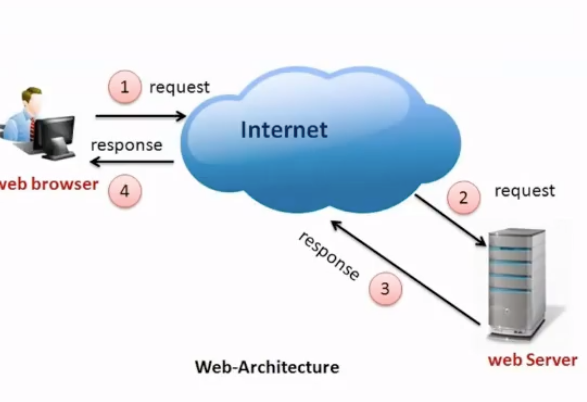

## Protocolo HTTP/1
El Protocolo de transferencia de hipertexto (en inglés, Hypertext Transfer Protocol, abreviado HTTP) es el protocolo de comunicación que permite las transferencias de información en la World Wide Web. HTTP fue desarrollado por el World Wide Web Consortium y la Internet Engineering Task Force, colaboración que culminó en 1999 con la publicación de una serie de RFC, siendo el más importante de ellos el RFC 2616 que especifica la versión 1.1. HTTP define la sintaxis y la semántica que utilizan los elementos de software de la arquitectura web (clientes, servidores, proxies) para comunicarse. HTTP es un protocolo sin estado, es decir, no guarda ninguna información sobre conexiones anteriores. El desarrollo de aplicaciones web necesita frecuentemente mantener estado. Para esto se usan las cookies, que es información que un servidor puede almacenar en el sistema cliente. Esto le permite a las aplicaciones web instituir la noción de sesión, y también permite rastrear usuarios ya que las cookies pueden guardarse en el cliente por tiempo indeterminado.[texto del enlace](https://)

¿Que es un token? y API restful
La tokenización, cuando se aplica a la seguridad de los datos, es el proceso de sustitución de un elemento de datos sensible por un equivalente no sensible, denominado token, que no tiene un significado o valor extrínseco o explotable. El token es una referencia (es decir, un identificador) que regresa a los datos sensibles a través de un sistema de tokenización. El mapeo de datos originales a un token utiliza métodos que hacen que los tokens no sean factibles de revertir en ausencia del sistema de tokenización, por ejemplo, utilizando tokens creados a partir de números aleatorios.

Por ello una de las nuevas tendencias en cuanto al desarrollo web moderno se refiere, es la autenticación por medio de Tokens y que nuestro backend sea un API RESTful sin información de estado, stateless.

El funcionamiento es el siguiente. El usuario se autentica en nuestra aplicación, bien con un par usuario/contraseña, o a través de un proveedor como puede ser Twitter, Facebook o Google por ejemplo. A partir de entonces, cada petición HTTP que haga el usuario va acompañada de un Token en la cabecera. Este Token no es más que una firma cifrada que permite a nuestro API identificar al usuario. Pero este Token no se almacena en el servidor, si no en el lado del cliente (por ejemplo en localStorage o sessionStorage) y el API es el que se encarga de descrifrar ese Token y redirigir el flujo de la aplicación en un sentido u otro.

Como los tokens son almacenados en el lado del cliente, no hay información de estado y la aplicación se vuelve totalmente escalable. Podemos usar el mismo API para diferentes apliaciones (Web, Mobile, Android, iOS, ...) solo debemos preocuparnos de enviar los datos en formato JSON y generar y descrifrar tokens en la autenticación y posteriores peticiones HTTP a través de un middleware.

### 1) registrarse en  https://www.alphavantage.co  y obtener un api token

In [ ]:
API_KEY = "2Z94P9XNJI6D90YV"
API_KEY = "VNR56C4O6YPENOQN"
API_KEY = "VNR56C4O6YPENOQN"

### 2) refactorizar el siguiente código


cambiar la url y llevarla a la forma de parametros en un diccionario y no como una concatenacion de strings.

In [ ]:
import requests

#Definimos las variables (parámetros)
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
token = "2Z94P9XNJI6D90YV"
interval = "1min"

# Concateno la URL a visitar:
urlBase = 'https://www.alphavantage.co/query'
url = urlBase+'?function='+function
url += '&symbol='+str(symbol)
url += '&interval='+interval
url += '&outputsize=compact'
url += '&apikey='+token

# Acá hago el llamado/Request
r = requests.get(url)
r.json()

In [ ]:
interval = "1min"
dicc = {
    "function" : 'TIME_SERIES_INTRADAY',
    "symbol"   : 'AAPL',
    "interval" : interval,
     "apikey"  : API_KEY 
}

r =  requests.get('https://www.alphavantage.co/query', params= dicc)

In [ ]:
OK = 200
MUCHO_OK = 203
if ( r.status_code >=  OK and  r.status_code <= MUCHO_OK ):
  print ( "segui con el flujo principal")
elif (r.status_code >=  300 and  r.status_code <= 320 ):
  print("Anduvo pero esta redirigido")
else:
  print("algo anda mal ")
r.status_code

algo anda mal 


404

### 3) buscar en la documentacion e implementar el request a la api para devolver indicadores tecnicos:
https://www.alphavantage.co/documentation/

*   SMA
*   EMA
*   MACD



In [ ]:
def funcionLoca ( par1, par2):
  return par1, par2

In [ ]:
funcionLoca(par2 = "par2", par1="sdfdsfs")

('sdfdsfs', 'par2')

In [ ]:
### Posible solucion
#
#
# SMA
interval = "weekly"
diccio = {
    "apikey"  : API_KEY,
    "function" : 'SMA',
    "symbol"   : 'AAPL',
    "interval" : interval,
     "time_period": 10,
     "series_type": "open" 
}

requests.get("https://www.alphavantage.co/query", params =diccio).json()

In [ ]:
def indicadoresTecnicos(ticker, indicador, intervalo, periodo, tipo_serie):
  parametros = {
    "apikey"  : API_KEY,
    "function" : indicador,
    "symbol"   : ticker,
    "interval" : interval,
     "time_period": periodo,
     "series_type": tipo_serie 
  }

  return requests.get("https://www.alphavantage.co/query", params =parametros).json()


In [ ]:
indicadoresTecnicos("AAPL","MACD","weekly", 10, "open")

In [ ]:
# EMA
requests.get("https://www.alphavantage.co/query?function=EMA&symbol=IBM&interval=weekly&time_period=10&series_type=open&apikey=demo").json()

In [ ]:
#https://www.fmlabs.com/reference/default.htm?url=WeightedMA.htm

In [ ]:
#MACD

requests.get("https://www.alphavantage.co/query?function=MACD&symbol=IBM&interval=daily&series_type=open&apikey=demo")

<Response [200]>

### 4) Dentro de la informacion de fundamentals, buscar e implementar la llamada a Company Overview.

In [ ]:
parametros = {
    "function": "OVERVIEW",
    "symbol" : "AAPL",
    "apikey" : API_KEY
}


requests.get("https://www.alphavantage.co/query", params = parametros).json()

In [ ]:
import pandas as pd


pd.read_csv("https://www.alphavantage.co/query?function=IPO_CALENDAR&apikey=demo")

,symbol,name,ipoDate,priceRangeLow,priceRangeHigh,currency,exchange
0,DISA,Disruptive Acquisition Corporation I Class A O...,2021-05-14,0.0,0.0,USD,NASDAQ
1,DTST,Data Storage Corporation Common Stock,2021-05-14,0.0,0.0,USD,NASDAQ
2,DCRCW,Decarbonization Plus Acquisition Corporation I...,2021-05-14,0.0,0.0,USD,NASDAQ
3,DCRC,Decarbonization Plus Acquisition Corporation I...,2021-05-14,0.0,0.0,USD,NASDAQ
4,ZENV,Zenvia Inc.,2021-05-14,15.5,17.5,USD,NASDAQ
5,SPKU,SPK Acquisition Corp.,2021-05-14,10.0,10.0,USD,NASDAQ
6,CRZN,Corazon Capital V838 Monoceros Corp Class A Or...,2021-05-14,0.0,0.0,USD,NASDAQ
7,EJH,E-Home Household Service Holdings Limited Ordi...,2021-05-14,4.5,4.5,USD,NASDAQ
8,MCAEU,Mountain Crest Acquisition Corp. III,2021-05-14,10.0,10.0,USD,NASDAQ
9,DTSTW,Data Storage Corporation Warrant,2021-05-14,0.0,0.0,USD,NASDAQ


## Forex

Crear una funcion que utilizando la api de alphavantage me devuelva informacion en tiempo real de un par de monedas en forex

In [ ]:
%%time
for _ in range (10):
    requests.get(f"https://www.alphavantage.co/query?function=MACD&symbol=IBM&interval=daily&series_type=open&apikey={API_KEY}")




CPU times: user 200 ms, sys: 10.5 ms, total: 210 ms
Wall time: 3.77 s


In [ ]:
 requests.get(f"https://www.alphavantage.co/query?function=MACD&symbol=IBM&interval=daily&series_type=open&apikey={API_KEY}").text

'{\n    "Meta Data": {\n        "1: Symbol": "IBM",\n        "2: Indicator": "Moving Average Convergence/Divergence (MACD)",\n        "3: Last Refreshed": "2021-05-14",\n        "4: Interval": "daily",\n        "5.1: Fast Period": 12,\n        "5.2: Slow Period": 26,\n        "5.3: Signal Period": 9,\n        "6: Series Type": "open",\n        "7: Time Zone": "US/Eastern"\n    },\n    "Technical Analysis: MACD": {\n        "2021-05-14": {\n            "MACD_Signal": "3.3910",\n            "MACD": "3.0998",\n            "MACD_Hist": "-0.2912"\n        },\n        "2021-05-13": {\n            "MACD_Signal": "3.4638",\n            "MACD": "3.1421",\n            "MACD_Hist": "-0.3218"\n        },\n        "2021-05-12": {\n            "MACD_Signal": "3.5443",\n            "MACD": "3.5229",\n            "MACD_Hist": "-0.0213"\n        },\n        "2021-05-11": {\n            "MACD_Signal": "3.5496",\n            "MACD": "3.7145",\n            "MACD_Hist": "0.1649"\n        },\n        "2021-

In [ ]:
def forex(moneda_origen, moneda_destino):
  import requests
  funcion = "CURRENCY_EXCHANGE_RATE"
  url = "https://www.alphavantage.co/query"
  parametros = {"function": funcion, 
                "from_currency": moneda_origen, "to_currency":moneda_destino,
                "apikey": API_KEY }
  r = requests.get(url, params= parametros)
  return r.json()

In [ ]:
import json
data = forex("ARS", "USD")
data

{'Realtime Currency Exchange Rate': {'1. From_Currency Code': 'ARS',
  '2. From_Currency Name': 'Argentine Peso',
  '3. To_Currency Code': 'USD',
  '4. To_Currency Name': 'United States Dollar',
  '5. Exchange Rate': '0.01013000',
  '6. Last Refreshed': '2021-05-14 20:06:31',
  '7. Time Zone': 'UTC',
  '8. Bid Price': '0.01012900',
  '9. Ask Price': '0.01013000'}}

## Crear una funcion que me devuelva el valor actual de cambio

## Ejercicio
Implementar una funcion que devuelva una serie con el valor del adx para un simbolo recibido por parametro, debe recibir como parametro el intervalo (1 min, 5 min...) y la cantidad de velas, el valor por defecto de las velas es de 50

In [ ]:
### Posible solucion
#
#

def obtenerADX(symbol, interval, time_period=50):
  import pandas as pd
  funcion  = "ADX"
  url = "https://www.alphavantage.co/query"
  parametros = {"function": funcion, 
                "symbol": symbol, "interval": interval, 
                "time_period":time_period,
                "apikey": API_KEY }
  r = requests.get(url, params= parametros)
  df = pd.DataFrame.from_dict( r.json()['Technical Analysis: ADX'], orient="index")
  df.astype("float")
  df.index.name="date"
  df = df.sort_values("date", ascending=True)
  df.index = pd.to_datetime(df.index)

  return df

In [ ]:
data = obtenerADX("AAPL","daily",10)

In [ ]:
data

,ADX
date,
1999-11-29,73.2836
1999-11-30,74.4192
1999-12-01,75.5028
1999-12-02,76.8714
1999-12-03,78.3120
...,...
2021-05-07,27.7341
2021-05-10,27.6084
2021-05-11,29.2692


## implementar una funcion que me sirva para obtener cualquiera de los siguietnes indicadores tecnicos
- ADX
- AROON
- CCI

## Ejercicio
Usando Pandas y read_html traer el price to book ratio de un activo disponible en la pagina

In [ ]:
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/AAPL/apple/price-book'
data = pd.read_html(url)[0]
#data.columns = data.columns.droplevel()
data.columns.droplevel()

Index(['Date', 'Stock Price', 'Book Value per Share', 'Price to Book Ratio'], dtype='object')

In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=IBM&apikey=demo'
r = requests.get(url)
data = r.json()
data

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2021-10-01 16:00:01',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'1999-12-31': {'1. open': '102.5600',
   '2. high': '122.1200',
   '3. low': '102.2500',
   '4. close': '107.8700',
   '5. volume': '158626300'},
  '2000-01-31': {'1. open': '112.4400',
   '2. high': '124.7500',
   '3. low': '109.6200',
   '4. close': '112.2500',
   '5. volume': '175259600'},
  '2000-02-29': {'1. open': '112.3700',
   '2. high': '119.7500',
   '3. low': '100.9400',
   '4. close': '102.7500',
   '5. volume': '133524400'},
  '2000-03-31': {'1. open': '102.0000',
   '2. high': '128.2500',
   '3. low': '99.5000',
   '4. close': '118.3700',
   '5. volume': '194329000'},
  '2000-04-28': {'1. open': '120.0000',
   '2. high': '128.0000',
   '3. low': '101.2500',
   '4. close': '111.5000',
   '5. volume': '168464800'},
  '2000-05-31': {'1. open': '112.5000',
   '2. hi